# Data Import and Setup


* Pandas and NumPy for data manipulation and analysis.  
*   Seaborn and Matplotlib for data visualization.

*   XGBoost for implementing the machine learning model.
*   Sklearn for preprocessing, model evaluation, and other utilities.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle
from sklearn.compose import ColumnTransformer
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load datasets from the provided links
# Specify the 'sep' parameter to handle different delimiters
# For example, if the delimiter is a semicolon, use sep=';'
# If the delimiter is a tab, use sep='\t'
# Experiment with different delimiters if necessary

# Function to read Google Sheet as CSV
def read_google_sheet_as_csv(sheet_url):
    """Reads a Google Sheet as a CSV string."""
    response = requests.get(sheet_url)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
    content = response.content.decode('utf-8')
    return io.StringIO(content)

train_url = 'https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=csv&gid=1607079722'
test_url = 'https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/export?format=csv&gid=2082460844'

train_data = pd.read_csv(read_google_sheet_as_csv(train_url))
test_data = pd.read_csv(read_google_sheet_as_csv(test_url))

# Preview data
train_data.head()
# test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


# Handling Missing Values

Before moving forward with data preprocessing, it's important to check for missing values in the dataset to understand if there are any gaps in the data that need to be addressed. Missing values can impact model performance if not handled properly.

In [3]:
# Check for missing values in the train and test datasets
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing Values in Test Data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In this step, missing values in the dataset are filled using the median value of each feature. The median is used as it is a robust measure of central tendency, especially for skewed data. After filling, we recheck the dataset to ensure all missing values have been handled.

In [4]:
train_data.fillna(train_data.median(), inplace=True)
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

Missing Values in Train Data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# ****Exploratory Data Analysis (EDA)****

**1-Distribution Analysis of Features**

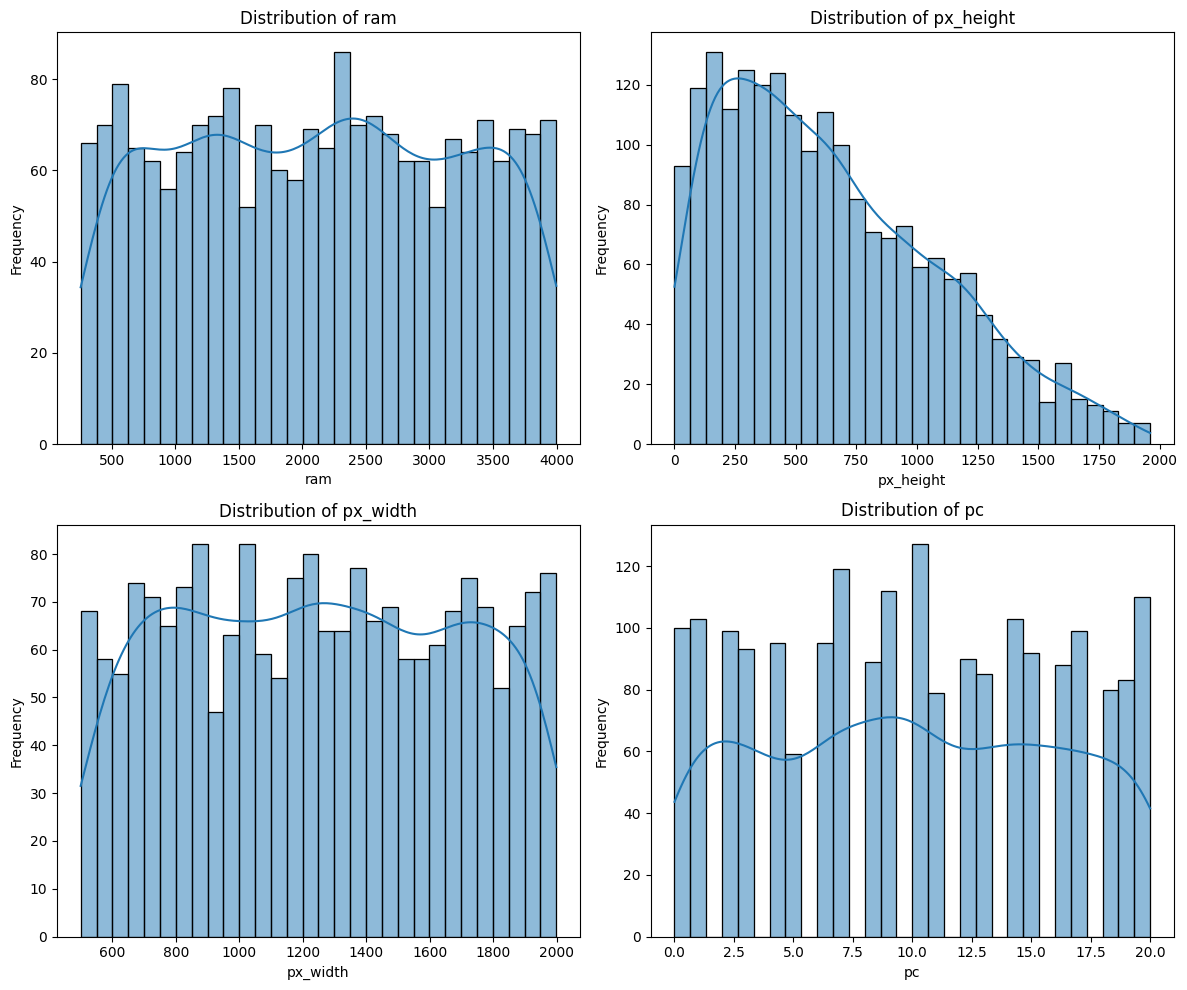

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select four features to plot
features = ['ram', 'px_height', 'px_width', 'pc']  # Adjust these as needed

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through the selected features and plot
for ax, feature in zip(axes, features):
    sns.histplot(train_data[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



Insights:

  This visualization will allow you to:

  Compare Distributions: Quickly compare the distributions of multiple features side by side.

  Identify Skewness: Assess the skewness of each feature, which can inform your data preprocessing decisions (e.g., applying transformations).

**2-Price Range Distribution**

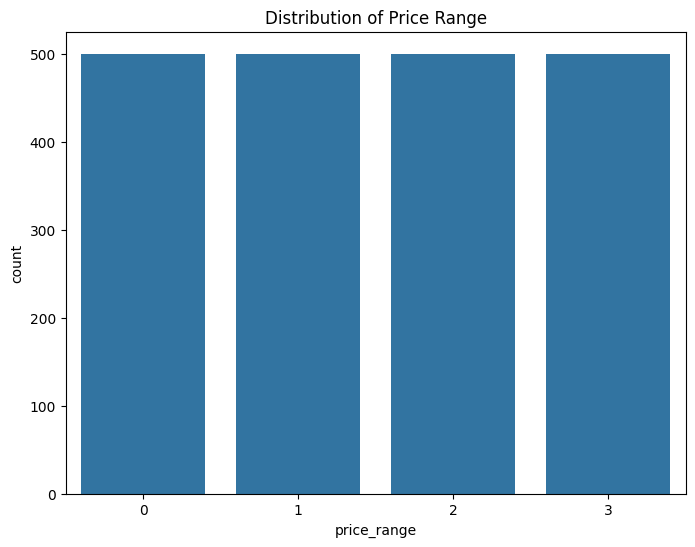

In [5]:


# Plot the distribution of the target variable (price_range)
plt.figure(figsize=(8,6))
sns.countplot(x='price_range', data=train_data)
plt.title("Distribution of Price Range")
plt.show()


Insight:
The price_range variable is equally distributed, which is beneficial for classification tasks as it prevents bias toward any particular class. No further adjustments for class imbalance (e.g., oversampling or undersampling) are necessary at this stage.

**3-Correlation Heatmap**

The heatmap visualizes the correlation coefficients between the features in the dataset. The correlation coefficient ranges from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 suggest little or no correlation.

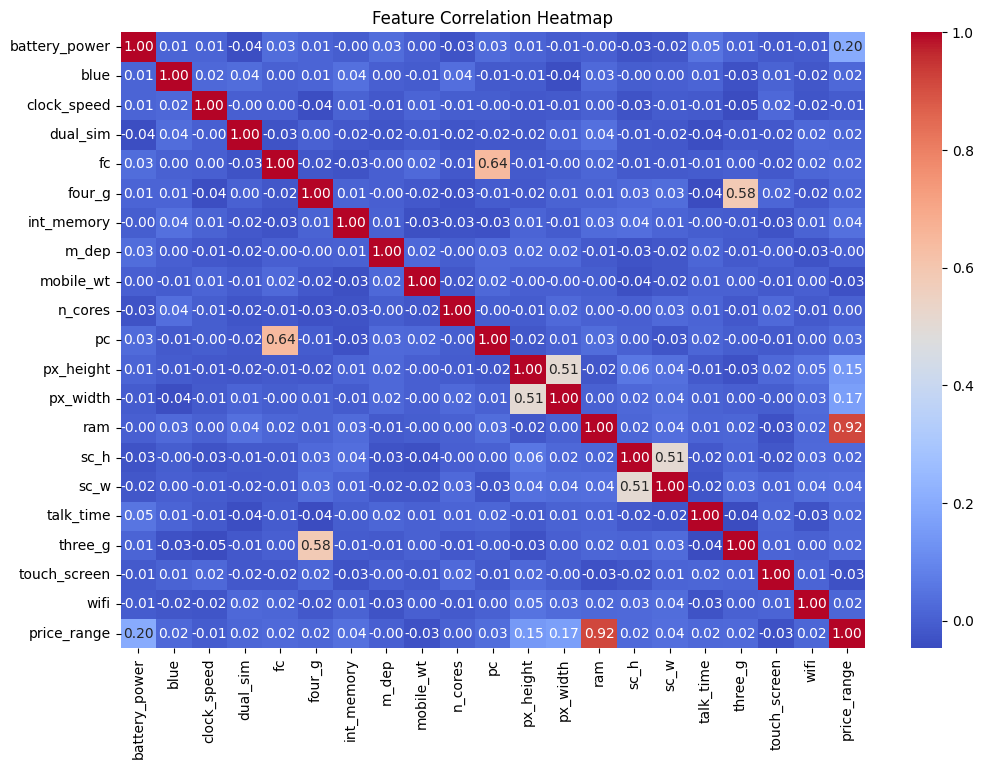

In [6]:
# Generate a correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


Insights:

  There is a high correlation between fc (front camera) and pc (primary camera), indicating that phones with better front cameras tend to also have better primary cameras.

  A strong correlation exists between four_g and three_g, suggesting that devices supporting 4G connectivity are likely to support 3G as well.
  The px_height and px_width features are also highly correlated, which is expected as they are dimensions of the same aspect (image resolution).

  Notably, a very high correlation of 0.92 between ram and the target variable price_range indicates that RAM size is a strong predictor of the device's price range. This suggests that as the RAM increases, the price of the phone also tends to increase, making it a critical feature for our predictive model.

**4-Box Plots**

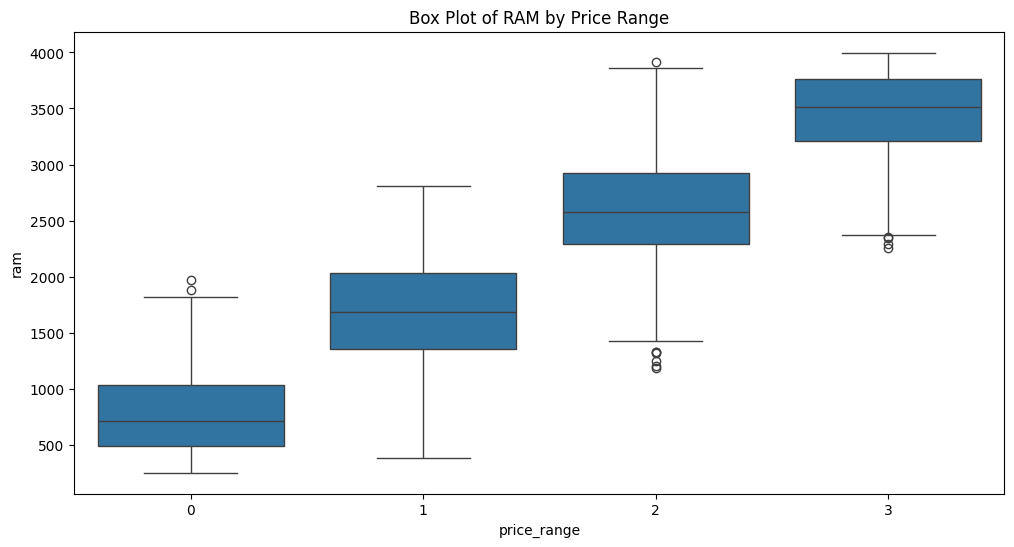

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price_range', y='ram', data=train_data)
plt.title('Box Plot of RAM by Price Range')
plt.show()


# Model Training

### Data Preparation

In this section, we prepare our dataset by defining the features and the target variable. We drop the target variable, `price_range`, from our features and set it aside.

Next, we split the dataset into training, validation, and test sets to ensure that our model can generalize well to unseen data. This is crucial in evaluating the model's performance.

We use `train_test_split` to create the following subsets:
- **Training Set (80%)**: Used for training the model.
- **Validation Set (10%)**: Used to tune hyperparameters and validate model performance during training.
- **Test Set (10%)**: Reserved for the final evaluation of the model's performance.

This stratified sampling approach maintains the distribution of the target classes across the subsets.


### Feature Identification
We identify the numerical and binary categorical features within our dataset. The continuous numerical features are standardized using `StandardScaler`, which helps in improving the model performance by ensuring that each feature contributes equally.

The binary features are passed through the preprocessing pipeline unchanged.

This preprocessing step is critical as it ensures that the model learns effectively from the input data without being influenced by the varying scales of different features.


In [ ]:
# Features and target variable
X = train_data.drop(columns=[ 'price_range'])
y = train_data['price_range']

# Splitting the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Identify numerical and binary categorical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
                      'ram', 'sc_h', 'sc_w', 'talk_time']  # Continuous numerical features

# Define binary features that should remain unchanged
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Define a column transformer that preprocesses numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Normalize continuous features
    ],
    remainder='passthrough'  # Leave the binary features unchanged
)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

print(f'Type of preprocessor before saving: {type(preprocessor)}')

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

Type of preprocessor before saving: <class 'sklearn.compose._column_transformer.ColumnTransformer'>


['preprocessor.pkl']

### Model Training

We initialize the XGBoost classifier for classification tasks. XGBoost is an efficient and powerful implementation of gradient-boosted trees, which are particularly suited for classification problems.

To optimize the model's performance, we employ hyperparameter tuning using `GridSearchCV`. This technique explores different combinations of hyperparameters to identify the best-performing set for our model.

The parameter grid includes:
- **Learning Rate**: Controls the contribution of each tree to the final prediction.
- **Max Depth**: Specifies the maximum depth of a tree, controlling its complexity.
- **Number of Estimators**: Defines how many trees to use in the ensemble.
- **Subsample and Colsample_bytree**: These parameters help to prevent overfitting by sampling the data and features.
- **Min Child Weight and Gamma**: These parameters further control the complexity of the model.

The grid search uses F1 score (macro average) as the evaluation metric, which provides a balanced measure of precision and recall.


In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# import joblib
# import matplotlib.pyplot as plt

# # Load dataset


# # Features and target variable
# X = train_data.drop(columns=[ 'price_range'])
# y = train_data['price_range']

# # Splitting the dataset into train, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# # Identify numerical and binary categorical features
# numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
#                       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
#                       'ram', 'sc_h', 'sc_w', 'talk_time']  # Continuous numerical features

# # Define binary features that should remain unchanged
# binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# # Define a column transformer that preprocesses numerical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),  # Normalize continuous features
#     ],
#     remainder='passthrough'  # Leave the binary features unchanged
# )

# # Preprocess the data
# X_train = preprocessor.fit_transform(X_train)
# X_val = preprocessor.transform(X_val)
# X_test = preprocessor.transform(X_test)

# # Save the preprocessor
# joblib.dump(preprocessor, 'preprocessor.pkl')

# # Initialize XGBoost classifier
# xgb_model = xgb.XGBClassifier( eval_metric='mlogloss')

# # Hyperparameter tuning using GridSearchCV
# # param_grid = {
# #     'n_estimators': [50, 100],
# #     'max_depth': [3, 5, 7],
# #     'learning_rate': [0.01, 0.1, 0.2],
# # }
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'n_estimators': [100, 200],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
# }

# # Add return_train_score=True to get training scores
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1_macro', return_train_score=True, verbose=1)
# grid_search.fit(X_train, y_train)

# # Best model from grid search
# best_model = grid_search.best_estimator_
# print("Best Hyperparameters: ", grid_search.best_params_)

# # Training the final model
# best_model.fit(X_train, y_train)

# # Predict on validation set
# y_val_pred = best_model.predict(X_val)

# # Evaluation metrics
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_f1_score = f1_score(y_val, y_val_pred, average='macro')
# conf_matrix = confusion_matrix(y_val, y_val_pred)
# class_report = classification_report(y_val, y_val_pred)

# print(f'Validation Accuracy: {val_accuracy:.4f}')
# print(f'Validation F1 Score: {val_f1_score:.4f}')
# print("Confusion Matrix (Validation):\n", conf_matrix)
# print("Classification Report (Validation):\n", class_report)

# # Plotting the losses
# results = grid_search.cv_results_
# plt.figure(figsize=(12, 6))
# plt.plot(results['mean_train_score'], label='Training Score')
# plt.plot(results['mean_test_score'], label='Validation Score')
# plt.title('Training and Validation Scores')
# plt.xlabel('Grid Search Iterations')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

# # Save the model
# joblib.dump(best_model, 'xgb_model.pkl')
# print("Model saved as xgb_model.pkl")



### Model Evaluation

After identifying the best hyperparameters from the grid search, we train the final model on the training dataset.

We evaluate the model's performance on the validation dataset and obtain the following metrics:
- **Validation Accuracy**: 0.9550
- **Validation F1 Score**: 0.9550

These scores indicate a high level of predictive accuracy and balance between precision and recall.

#### Confusion Matrix
The confusion matrix shows the model's performance across the different classes:
### Model Saving

Finally, we save the trained model and the preprocessing pipeline using `joblib`. This allows us to easily load the model later for predictions without needing to retrain.


[0]	validation_0-mlogloss:1.16234	validation_1-mlogloss:1.17008
[1]	validation_0-mlogloss:1.01045	validation_1-mlogloss:1.02541
[2]	validation_0-mlogloss:0.89724	validation_1-mlogloss:0.91758
[3]	validation_0-mlogloss:0.80604	validation_1-mlogloss:0.82969
[4]	validation_0-mlogloss:0.73491	validation_1-mlogloss:0.75803
[5]	validation_0-mlogloss:0.67722	validation_1-mlogloss:0.69951
[6]	validation_0-mlogloss:0.62856	validation_1-mlogloss:0.65175
[7]	validation_0-mlogloss:0.58620	validation_1-mlogloss:0.61080
[8]	validation_0-mlogloss:0.55143	validation_1-mlogloss:0.57656
[9]	validation_0-mlogloss:0.52175	validation_1-mlogloss:0.54961
[10]	validation_0-mlogloss:0.49423	validation_1-mlogloss:0.52045
[11]	validation_0-mlogloss:0.47343	validation_1-mlogloss:0.50101
[12]	validation_0-mlogloss:0.44639	validation_1-mlogloss:0.47607
[13]	validation_0-mlogloss:0.42716	validation_1-mlogloss:0.45754
[14]	validation_0-mlogloss:0.40770	validation_1-mlogloss:0.44015
[15]	validation_0-mlogloss:0.39189	

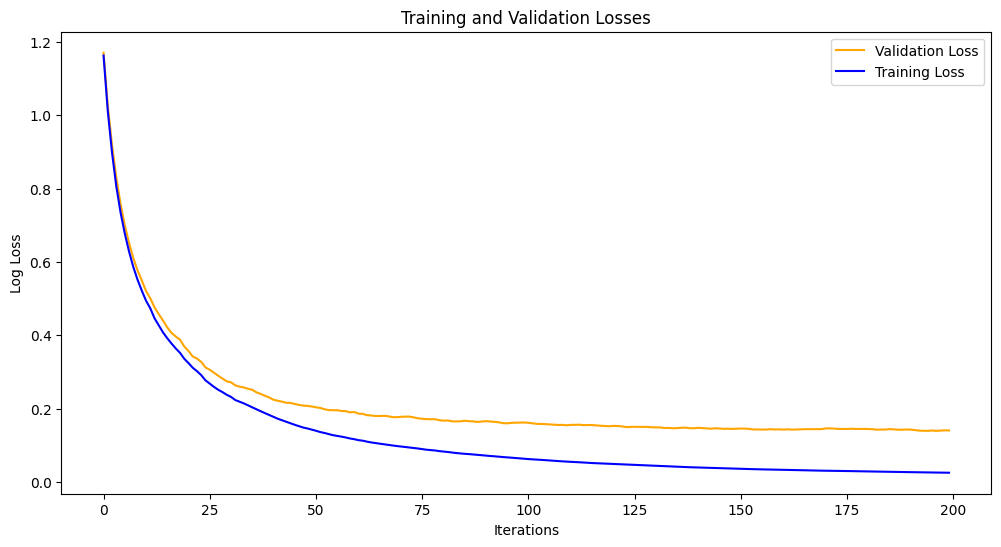

Model saved as xgb_model.pkl


In [ ]:
# Initialize XGBoost classifier with hyperparameters
best_hyperparams = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 3,
    'n_estimators': 200,
    'subsample': 0.6
}

best_model = xgb.XGBClassifier(**best_hyperparams, eval_metric='mlogloss')

## Train the final model with eval_set to capture validation metrics
best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

# Get evaluation metrics from training
results = best_model.evals_result()
print (results)

# Predict on validation set
y_val_pred = best_model.predict(X_val)

# Evaluation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='macro')
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation F1 Score: {val_f1_score:.4f}')
print("Confusion Matrix (Validation):\n", conf_matrix)
print("Classification Report (Validation):\n", class_report)

# Plotting the losses
plt.figure(figsize=(12, 6))
plt.plot(results['validation_1']['mlogloss'], label='Validation Loss', color='orange')
plt.plot(results['validation_0']['mlogloss'], label='Training Loss', color='blue')
plt.title('Training and Validation Losses')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Save the model
joblib.dump(best_model, 'xgb_model.pkl')
print("Model saved as xgb_model.pkl")

The classification report shows that the model performs excellently across all classes, with the precision, recall, and F1 scores being above 0.94. This indicates that the model is effective in distinguishing between different price ranges.

**Insights**
- The high accuracy and F1 scores suggest that the model generalizes well to unseen data.
- The confusion matrix highlights areas for potential improvement, particularly in the classification of certain classes.
- Future work could involve exploring additional feature engineering or alternative algorithms to further enhance model performance.


In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the trained model
model = joblib.load('/content/xgb_model.pkl')

# Load the scaler
scaler = joblib.load('/content/preprocessor.pkl')

# Sample input data
data = {
    "battery_power": 1725,     # Example battery power
    "blue": 1,                 # Bluetooth presence (0 or 1)
    "clock_speed": 1.6,       # Clock speed
    "dual_sim": 1,             # Dual SIM presence (0 or 1)
    "fc": 6,                   # Front camera
    "four_g": 1,              # 4G presence (0 or 1)
    "int_memory": 6,          # Internal memory
    "m_dep": 0.5,              # Mobile depth
    "mobile_wt": 119,         # Mobile weight
    "n_cores": 2,             # Number of cores
    "pc": 18,                  # Primary camera
    "px_height": 609,          # Pixel height
    "px_width": 1307,          # Pixel width
    "ram": 3429,              # RAM
    "sc_h": 6,                # Screen height
    "sc_w": 5,                # Screen width
    "talk_time": 4,          # Talk time
    "three_g": 1,             # 3G presence (0 or 1)
    "touch_screen": 1,        # Touch screen presence (0 or 1)
    "wifi": 0,                # WiFi presence (0 or 1)
}

# Convert the data to a DataFrame
input_data = pd.DataFrame([data])

# Scale the input data using the loaded scaler
scaled_input = scaler.transform(input_data)

# Make predictions
predictions = model.predict(scaled_input)
predicted_probabilities = model.predict_proba(scaled_input)

# Output the results
print("Predicted Class:", predictions[0])
print("Predicted Probabilities:", predicted_probabilities[0])


Predicted Class: 3
Predicted Probabilities: [2.9569887e-09 2.9753712e-08 4.4874767e-05 9.9995506e-01]
